In [76]:
import numpy as np
from matplotlib import RcParams
RcParams.update({"text.usetex":True})
import matplotlib.pyplot as plt
import matplotlib.image as im
from numpy.linalg import svd


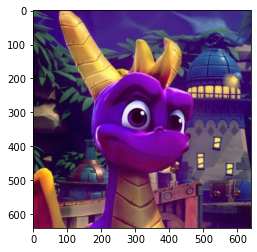

In [77]:
image = im.imread('./spyro.jpg')
plt.imshow(image)

In [78]:
image.shape

(640, 640, 3)

Es una imagen de $640$ por $640$ píxeles, cada pixel con $3$ valores para las cantidades de color rojo, verde y azul, es decir $640^2\cdot3 =1228800 $ elementos.

In [79]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

Cada uno de los canales de color es por lo tanto una matriz de $640$ filas por $640$ columnas.

Text(0.5, 1.0, 'Blue channel')

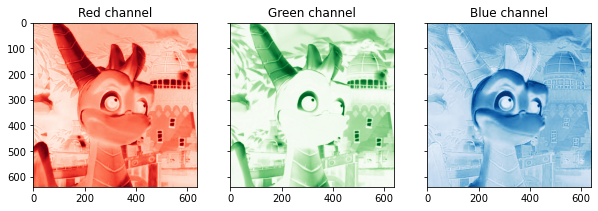

In [80]:
fig, ax = plt.subplots(1,3, sharey=True)
fig.set_size_inches(10,30)
ax[0].imshow(R,cmap='Reds')
ax[0].set_title('Red channel')
ax[1].imshow(G,cmap='Greens')
ax[1].set_title('Green channel')
ax[2].imshow(B,cmap='Blues')
ax[2].set_title('Blue channel')

Cada una de estas matrices se puede factorizar como:
$$\mathbf{A} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}$$
donde $\boldsymbol{\Sigma}$ es una matriz diagonal con valores mayores o iguales que cero (valores singulares). Esto valores singulares están ordenados en la matriz de mayor a menor.

Text(0.5, 1.0, 'Singular values')

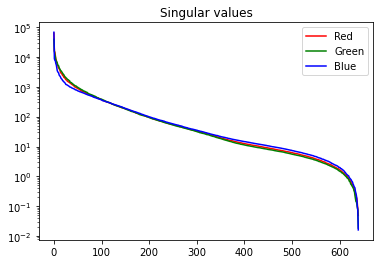

In [81]:
[uR, sR, vR ] = svd(R) 
[uG, sG, vG ] = svd(G) 
[uB, sB, vB ] = svd(B) 

plt.semilogy(sR,'r')
plt.semilogy(sG,'g')
plt.semilogy(sB,'b')
plt.legend(['Red','Green','Blue'])
plt.title('Singular values')


Puesto que los valores singulares pasan de valer cosas como $1\times 10^5$ a cosas como $1\times 10^{-2}$ podemos probar a no quedarnos con todos los valores, solo con los $N$ primeros. De ese modo sólo estaremos usando$N + 2N\cdot640$ elementos por matriz, es decir $3N + 6N\cdot640$ elementos en total. 


In [82]:
def approx(N):
    R_app = np.zeros_like(R) 
    G_app = np.zeros_like(G)
    B_app = np.zeros_like(B)
    for i in range(N):
        R_app = R_app + sR[i]*np.outer(uR[:,i],vR[i,:])
        G_app = G_app + sG[i]*np.outer(uG[:,i],vG[i,:])
        B_app = B_app + sB[i]*np.outer(uB[:,i],vB[i,:])

    image_app = np.zeros_like(image)
    image_app[:,:,0] = R_app
    image_app[:,:,1] = G_app
    image_app[:,:,2] = B_app
    plt.imshow(image_app)
    plt.title('compression of ${:.2f}\\,\\%$'.format((N + 2*N*640)/(640**2)*100))

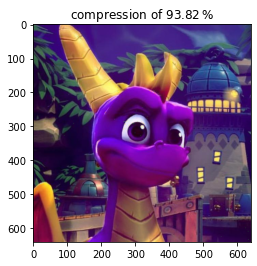

In [83]:
approx(300)

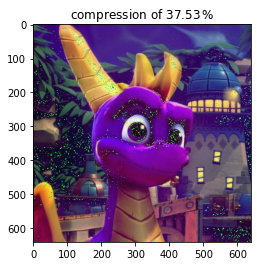

In [84]:
approx(120)

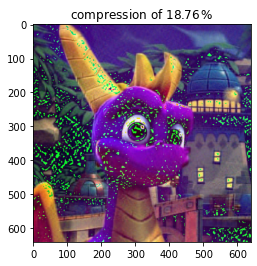

In [85]:
approx(60)